### Part A

In [396]:
# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS
# AND FINALLY CHOOSE AND TRAIN THE PREDICTOR THAT YOU WILL BE USING FOR PART B
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as graph
import seaborn as sns



In [366]:
train= pd.read_csv('CE802_P3_Data.csv')
train.head()


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
0,-190.1100,193.5300,2.3200,-21.8400,"11,289.7200",UK,"5,730.7200",638.5500,Very high,467.9700,...,174.8100,"23,994.5400",261.6900,5,-177.1500,17.6000,"-1,437.2000",4,178.2000,"1,306.2900"
1,-257.9400,"1,934.8500",24.3600,-22.0600,"2,712.1200",UK,"3,509.9400",389.5300,High,393.4200,...,265.4400,"11,554.0600",205.1400,4,-377.5500,16.3200,"-1,840.9200",7,83.5300,-118.0700
2,-426.0600,"1,071.8700",0.1000,-21.8000,"7,469.0100",USA,"4,633.2000",-28.6300,Medium,226.6200,...,542.9400,"28,254.5600",363.9300,5,-293.6700,17.6400,"-1,207.9200",5,218.5400,-708.1400
3,-204.4800,"1,533.9600",7.4200,-17.9400,"4,261.7700",Rest,"3,516.0600",335.3600,Very high,912.6300,...,527.1000,"21,449.3000",23.3100,4,-295.8000,20.4400,-139.5800,6,154.7400,"2,918.7500"
4,-232.0800,"1,334.8800",29.4800,-19.8800,"2,941.0200",Rest,"3,592.0400",-46.6800,Very low,601.4100,...,390.4800,"18,060.9800",248.7900,3,-222.1200,19.3900,"-2,130.0200",4,178.7700,"1,113.0900"


In [367]:
train_data = train.iloc[:,:-1].copy()
train_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36
0,-190.1100,193.5300,2.3200,-21.8400,"11,289.7200",UK,"5,730.7200",638.5500,Very high,467.9700,...,55.6500,174.8100,"23,994.5400",261.6900,5,-177.1500,17.6000,"-1,437.2000",4,178.2000
1,-257.9400,"1,934.8500",24.3600,-22.0600,"2,712.1200",UK,"3,509.9400",389.5300,High,393.4200,...,67.2300,265.4400,"11,554.0600",205.1400,4,-377.5500,16.3200,"-1,840.9200",7,83.5300
2,-426.0600,"1,071.8700",0.1000,-21.8000,"7,469.0100",USA,"4,633.2000",-28.6300,Medium,226.6200,...,47.2800,542.9400,"28,254.5600",363.9300,5,-293.6700,17.6400,"-1,207.9200",5,218.5400
3,-204.4800,"1,533.9600",7.4200,-17.9400,"4,261.7700",Rest,"3,516.0600",335.3600,Very high,912.6300,...,52.6500,527.1000,"21,449.3000",23.3100,4,-295.8000,20.4400,-139.5800,6,154.7400
4,-232.0800,"1,334.8800",29.4800,-19.8800,"2,941.0200",Rest,"3,592.0400",-46.6800,Very low,601.4100,...,58.8000,390.4800,"18,060.9800",248.7900,3,-222.1200,19.3900,"-2,130.0200",4,178.7700


In [368]:
data = pd.get_dummies(train_data, columns= ['F6','F9'])
data.head()

,F1,F2,F3,F4,F5,F7,F8,F10,F11,F12,...,F36,F6_Europe,F6_Rest,F6_UK,F6_USA,F9_High,F9_Low,F9_Medium,F9_Very high,F9_Very low
0,-190.1100,193.5300,2.3200,-21.8400,"11,289.7200","5,730.7200",638.5500,467.9700,202.7400,-655.6000,...,178.2000,0,0,1,0,0,0,0,1,0
1,-257.9400,"1,934.8500",24.3600,-22.0600,"2,712.1200","3,509.9400",389.5300,393.4200,-336.0300,272.4900,...,83.5300,0,0,1,0,1,0,0,0,0
2,-426.0600,"1,071.8700",0.1000,-21.8000,"7,469.0100","4,633.2000",-28.6300,226.6200,-279.9000,-243.0200,...,218.5400,0,0,0,1,0,0,1,0,0
3,-204.4800,"1,533.9600",7.4200,-17.9400,"4,261.7700","3,516.0600",335.3600,912.6300,-278.2200,"-1,175.0700",...,154.7400,0,1,0,0,0,0,0,1,0
4,-232.0800,"1,334.8800",29.4800,-19.8800,"2,941.0200","3,592.0400",-46.6800,601.4100,-274.9200,-617.4900,...,178.7700,0,1,0,0,0,0,0,0,1


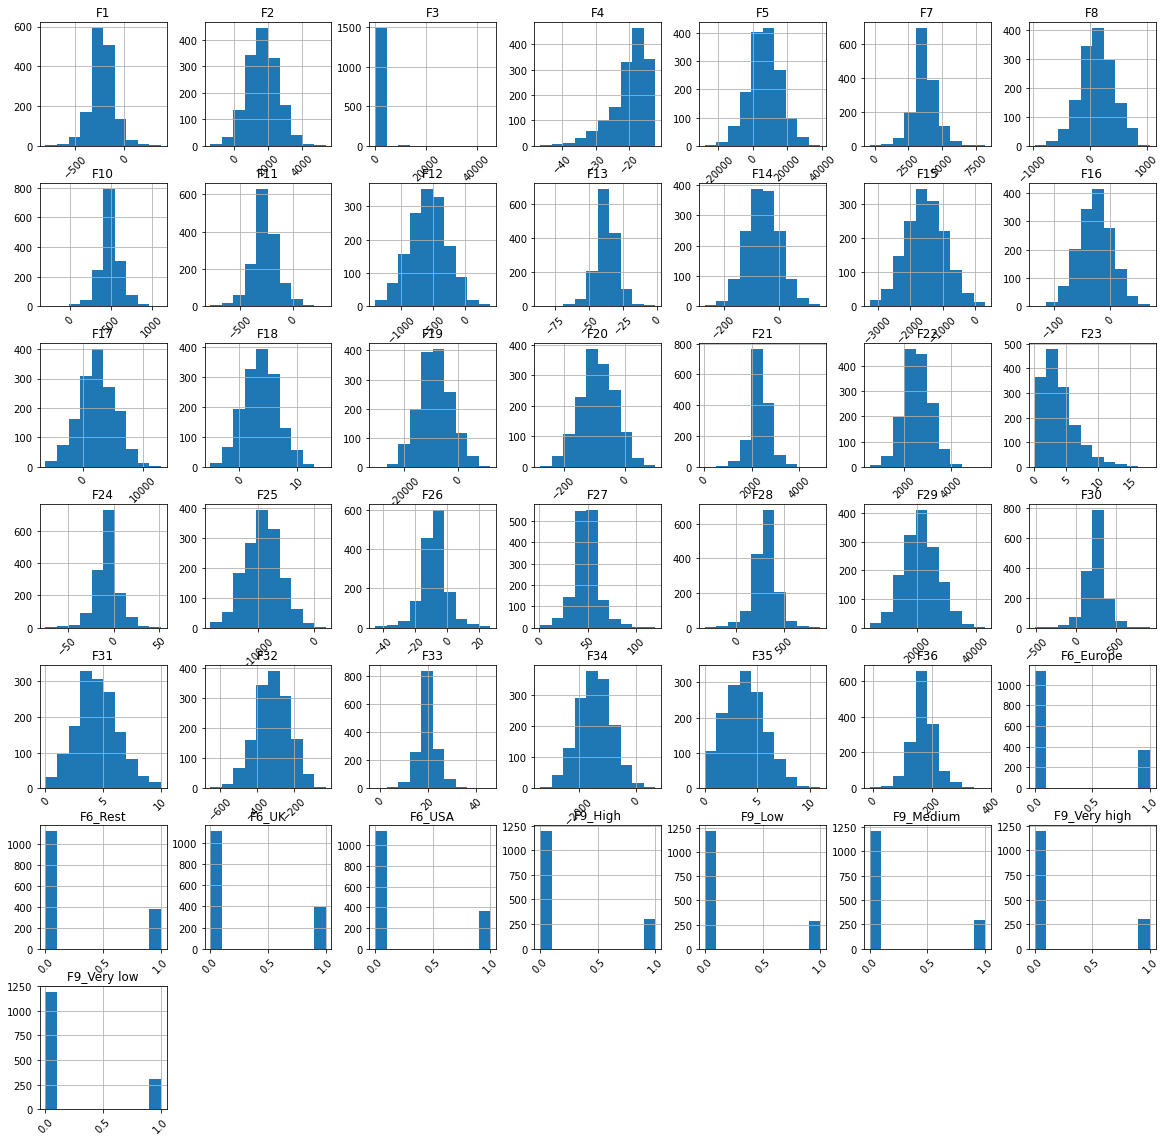

In [400]:
data.hist(figsize=(20,20), xrot=45)
graph.show()

In [369]:
train2=train.copy()
dummified = pd.get_dummies(train2, columns= ['F6','F9'])
dummified.head()

,F1,F2,F3,F4,F5,F7,F8,F10,F11,F12,...,Target,F6_Europe,F6_Rest,F6_UK,F6_USA,F9_High,F9_Low,F9_Medium,F9_Very high,F9_Very low
0,-190.1100,193.5300,2.3200,-21.8400,"11,289.7200","5,730.7200",638.5500,467.9700,202.7400,-655.6000,...,"1,306.2900",0,0,1,0,0,0,0,1,0
1,-257.9400,"1,934.8500",24.3600,-22.0600,"2,712.1200","3,509.9400",389.5300,393.4200,-336.0300,272.4900,...,-118.0700,0,0,1,0,1,0,0,0,0
2,-426.0600,"1,071.8700",0.1000,-21.8000,"7,469.0100","4,633.2000",-28.6300,226.6200,-279.9000,-243.0200,...,-708.1400,0,0,0,1,0,0,1,0,0
3,-204.4800,"1,533.9600",7.4200,-17.9400,"4,261.7700","3,516.0600",335.3600,912.6300,-278.2200,"-1,175.0700",...,"2,918.7500",0,1,0,0,0,0,0,1,0
4,-232.0800,"1,334.8800",29.4800,-19.8800,"2,941.0200","3,592.0400",-46.6800,601.4100,-274.9200,-617.4900,...,"1,113.0900",0,1,0,0,0,0,0,0,1


In [370]:
pd.options.display.float_format='{:,.4f}'.format
corr_matrix=dummified.corr()
corr_matrix

,F1,F2,F3,F4,F5,F7,F8,F10,F11,F12,...,Target,F6_Europe,F6_Rest,F6_UK,F6_USA,F9_High,F9_Low,F9_Medium,F9_Very high,F9_Very low
F1,1.0000,0.0165,-0.0125,-0.0711,-0.0451,-0.0524,-0.0180,0.0016,-0.0314,-0.0564,...,-0.0825,-0.0206,-0.0410,0.0842,-0.0243,0.0324,-0.0386,-0.0502,-0.0008,0.0553
F2,0.0165,1.0000,0.0014,-0.0217,-0.0523,0.0230,0.0017,-0.0212,0.0307,-0.0147,...,0.2930,0.0450,-0.0166,-0.0061,-0.0220,0.0035,-0.0134,0.0534,-0.0171,-0.0259
F3,-0.0125,0.0014,1.0000,0.0066,-0.0105,-0.0115,0.0341,-0.0390,0.0018,-0.0052,...,0.1064,-0.0003,-0.0007,-0.0124,0.0137,-0.0133,-0.0390,0.0409,0.0075,0.0035
F4,-0.0711,-0.0217,0.0066,1.0000,0.0057,-0.0094,0.0147,-0.0151,-0.0008,0.0206,...,0.4636,-0.0313,0.0461,-0.0170,0.0021,0.0254,0.0353,0.0338,-0.0517,-0.0413
F5,-0.0451,-0.0523,-0.0105,0.0057,1.0000,0.0164,0.0211,-0.0182,0.0449,-0.0288,...,-0.0046,-0.0464,-0.0279,0.0190,0.0553,-0.0045,0.0228,-0.0154,0.0121,-0.0147
F7,-0.0524,0.0230,-0.0115,-0.0094,0.0164,1.0000,-0.0181,-0.0013,0.0440,0.0397,...,0.0548,-0.0137,0.0340,-0.0485,0.0290,0.0275,0.0170,-0.0115,0.0110,-0.0437
F8,-0.0180,0.0017,0.0341,0.0147,0.0211,-0.0181,1.0000,-0.0112,0.0474,0.0024,...,0.0858,-0.0305,-0.0273,0.0721,-0.0158,0.0046,0.0203,0.0298,-0.0130,-0.0407
F10,0.0016,-0.0212,-0.0390,-0.0151,-0.0182,-0.0013,-0.0112,1.0000,-0.0175,-0.0056,...,-0.0194,0.0129,-0.0067,-0.0355,0.0302,0.0238,-0.0398,-0.0048,-0.0058,0.0255
F11,-0.0314,0.0307,0.0018,-0.0008,0.0449,0.0440,0.0474,-0.0175,1.0000,-0.0277,...,0.0417,0.0332,-0.0029,-0.0117,-0.0182,-0.0264,-0.0399,0.0775,0.0096,-0.0206
F12,-0.0564,-0.0147,-0.0052,0.0206,-0.0288,0.0397,0.0024,-0.0056,-0.0277,1.0000,...,-0.0037,0.0348,-0.0076,-0.0121,-0.0147,-0.0244,0.0439,0.0315,-0.0404,-0.0091


In [371]:
corr_matrix['Target'].sort_values(ascending=False)

Target          1.0000
F4              0.4636
F2              0.2930
F6_Rest         0.2901
F9_Very high    0.1606
F9_High         0.1466
F3              0.1064
F8              0.0858
F34             0.0780
F36             0.0568
F7              0.0548
F13             0.0436
F11             0.0417
F14             0.0369
F28             0.0335
F9_Medium       0.0284
F27             0.0217
F19             0.0180
F23             0.0074
F18             0.0061
F17            -0.0012
F15            -0.0013
F12            -0.0037
F5             -0.0046
F32            -0.0108
F6_UK          -0.0112
F33            -0.0151
F29            -0.0157
F16            -0.0181
F10            -0.0194
F22            -0.0228
F30            -0.0233
F21            -0.0257
F26            -0.0489
F24            -0.0505
F20            -0.0525
F9_Low         -0.0727
F1             -0.0825
F6_USA         -0.0959
F31            -0.1359
F6_Europe      -0.1862
F25            -0.2116
F9_Very low    -0.2641
F35        

In [372]:
data.dtypes

F1              float64
F2              float64
F3              float64
F4              float64
F5              float64
F7              float64
F8              float64
F10             float64
F11             float64
F12             float64
F13             float64
F14             float64
F15             float64
F16             float64
F17             float64
F18             float64
F19             float64
F20             float64
F21             float64
F22             float64
F23             float64
F24             float64
F25             float64
F26             float64
F27             float64
F28             float64
F29             float64
F30             float64
F31               int64
F32             float64
F33             float64
F34             float64
F35               int64
F36             float64
F6_Europe         uint8
F6_Rest           uint8
F6_UK             uint8
F6_USA            uint8
F9_High           uint8
F9_Low            uint8
F9_Medium         uint8
F9_Very high    

In [373]:
data.isnull().sum()

F1              0
F2              0
F3              0
F4              0
F5              0
F7              0
F8              0
F10             0
F11             0
F12             0
F13             0
F14             0
F15             0
F16             0
F17             0
F18             0
F19             0
F20             0
F21             0
F22             0
F23             0
F24             0
F25             0
F26             0
F27             0
F28             0
F29             0
F30             0
F31             0
F32             0
F33             0
F34             0
F35             0
F36             0
F6_Europe       0
F6_Rest         0
F6_UK           0
F6_USA          0
F9_High         0
F9_Low          0
F9_Medium       0
F9_Very high    0
F9_Very low     0
dtype: int64

In [374]:
y_train=train['Target']
train_X, test_X, train_Y, test_Y = train_test_split(data, y_train, test_size=0.25,random_state=1)

In [375]:
reg_1 = LinearRegression()
reg_1.fit(train_X,train_Y)
predicted= reg_1.predict(test_X)
print(predicted)
print('Accuracy:')
print(r2_score(test_Y,predicted))
rmse1=(np.sqrt(mean_squared_error(test_Y,predicted)))
print(rmse1)

[ 1551.92419061    30.10742471  -996.7397656   1142.44747921
    23.17910147   384.48725823  2849.21298675  1439.16197686
   602.25283957  2207.29146121  1485.85593269  1260.88041315
  2018.55277392   607.64370607  -394.23421215   877.92242421
   152.25709905  1170.41826059  -259.08147594  2085.39090098
  2297.45207374   773.36353778  1519.8033401   -460.25050568
   154.48809012  2006.22815738 -1135.17191418  2669.93705341
   966.83205681  1204.82685583   966.26607939    73.40941023
  -185.32035917  1483.59620468  -689.27436025  1045.89283508
  1440.83931493   102.33023773    -4.85986553   590.84889277
   698.36779169  1573.56764523  -596.47002235  1336.46044266
   321.39078108   -36.84333359  1423.09164824  1054.07345325
  1433.98677517  1045.2966899   1411.63216153  1161.96099414
    41.18058819   558.61411628  1234.02603185  1491.1527699
  1225.00442402   523.09885705   626.05348137  -618.16042729
   727.09576658   661.59248119   647.45774454   191.62221682
  1992.86196031  3023.221

In [376]:
regr_2 = DecisionTreeRegressor(max_depth=2)
regr_2.fit(train_X,train_Y)
prediction = regr_2.predict(test_X)
print(prediction)
print('Accuracy Score')
print(r2_score(test_Y, prediction))
rmse2=(np.sqrt(mean_squared_error(test_Y,prediction)))
print(rmse2)

[ 833.12392265 1647.66131579  540.36180412 1647.66131579 1647.66131579
 -200.2237037   833.12392265  833.12392265  540.36180412 1647.66131579
 1647.66131579  833.12392265  540.36180412 -200.2237037  -200.2237037
 1647.66131579  540.36180412 1647.66131579 1647.66131579 -200.2237037
 1647.66131579 1647.66131579  833.12392265 -200.2237037  -200.2237037
  833.12392265 -200.2237037  1647.66131579 1647.66131579  833.12392265
 1647.66131579  540.36180412  833.12392265 1647.66131579 -200.2237037
 1647.66131579  833.12392265 -200.2237037   833.12392265  833.12392265
 1647.66131579  540.36180412  833.12392265 1647.66131579 1647.66131579
  833.12392265  833.12392265  833.12392265 1647.66131579  833.12392265
  833.12392265 1647.66131579 -200.2237037   833.12392265  833.12392265
 1647.66131579 1647.66131579 1647.66131579  540.36180412  833.12392265
 1647.66131579  833.12392265  833.12392265 1647.66131579  833.12392265
 1647.66131579  833.12392265 -200.2237037  -200.2237037  1647.66131579
 -200.2237

In [377]:
reg_3= ElasticNet()
reg_3.fit(train_X,train_Y)
predictedValue=reg_3.predict(test_X)
print(predictedValue)
print('Accuracy Score')
print(r2_score(test_Y, predictedValue))
rmse3=(np.sqrt(mean_squared_error(test_Y,predictedValue)))
print(rmse3)


[ 1.39898349e+03  7.39132382e+02 -4.03379840e+02  1.11184718e+03
 -1.28857545e+01  3.21552176e+02  2.42960451e+03  1.44392891e+03
  5.96458116e+02  1.96899172e+03  1.42723133e+03  1.22339236e+03
  1.63188334e+03  5.62170782e+02  1.86406820e+01  9.51233883e+02
  1.36508899e+02  1.31095892e+03  2.33544440e+02  1.52672442e+03
  2.46246088e+03  3.23528119e+02  1.16918915e+03 -2.91355573e+02
 -9.40826691e+00  2.02604858e+03 -5.20269855e+02  2.28621914e+03
  1.39580178e+03  9.88207525e+02  1.55192428e+03 -9.83501953e+01
  3.47221301e+02  1.30852617e+03 -6.42180099e+02  8.93132735e+02
  1.52340358e+03  6.14476897e+01  5.00895372e+02  5.52457396e+02
  9.60747425e+02  1.75378315e+03 -1.52383515e+02  1.31665280e+03
  4.76384862e+02  6.41357323e+02  1.13943313e+03  9.12583903e+02
  1.78488869e+03  9.92213845e+02  1.31529018e+03  1.24869180e+03
  4.26172436e+02  1.05458493e+03  9.19046340e+02  1.83821972e+03
  1.84573804e+03  4.42932372e+02  4.80087903e+02  1.90104182e+02
  7.91906211e+02  3.76182

### Part B

In [387]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('CE802_P3_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()


In [388]:
data_dum = pd.get_dummies(test_data, columns= ['F6','F9'])
data_dum.head()

,F1,F2,F3,F4,F5,F7,F8,F10,F11,F12,...,F36,F6_Europe,F6_Rest,F6_UK,F6_USA,F9_High,F9_Low,F9_Medium,F9_Very high,F9_Very low
0,-72.1800,995.4900,0.6000,-21.6400,"-13,656.5400","4,748.6000",40.7200,686.0400,-479.0100,-659.8600,...,252.5800,0,1,0,0,1,0,0,0,0
1,-229.6800,"2,337.3600",2.0200,-17.9000,"12,620.4000","3,211.3200",-140.3800,447.6300,-233.8800,-396.7100,...,132.2500,0,0,0,1,0,0,0,0,1
2,-402.2400,"2,830.7700",0.0400,-35.1400,-102.9300,"3,602.0000",387.1800,379.9800,-237.3000,-780.8200,...,138.7500,0,0,1,0,0,1,0,0,0
3,-369.6600,"1,331.0700",7.3600,-15.3800,"-1,616.1300","3,375.2400",126.9300,467.1600,-327.4500,-708.2400,...,182.6300,0,0,1,0,0,1,0,0,0
4,-321.5700,"1,511.7000","3,518.0000",-29.0400,"4,321.4400","5,541.9600",34.9800,510.4500,-161.4900,-719.3900,...,165.6100,0,0,0,1,0,0,0,0,1


In [389]:
data_dum.dtypes

F1              float64
F2              float64
F3              float64
F4              float64
F5              float64
F7              float64
F8              float64
F10             float64
F11             float64
F12             float64
F13             float64
F14             float64
F15             float64
F16             float64
F17             float64
F18             float64
F19             float64
F20             float64
F21             float64
F22             float64
F23             float64
F24             float64
F25             float64
F26             float64
F27             float64
F28             float64
F29             float64
F30             float64
F31               int64
F32             float64
F33             float64
F34             float64
F35               int64
F36             float64
F6_Europe         uint8
F6_Rest           uint8
F6_UK             uint8
F6_USA            uint8
F9_High           uint8
F9_Low            uint8
F9_Medium         uint8
F9_Very high    

In [390]:
data.isnull().sum()

F1              0
F2              0
F3              0
F4              0
F5              0
F7              0
F8              0
F10             0
F11             0
F12             0
F13             0
F14             0
F15             0
F16             0
F17             0
F18             0
F19             0
F20             0
F21             0
F22             0
F23             0
F24             0
F25             0
F26             0
F27             0
F28             0
F29             0
F30             0
F31             0
F32             0
F33             0
F34             0
F35             0
F36             0
F6_Europe       0
F6_Rest         0
F6_UK           0
F6_USA          0
F9_High         0
F9_Low          0
F9_Medium       0
F9_Very high    0
F9_Very low     0
dtype: int64

In [393]:
predicted= reg_1.predict(data_dum)
print(predicted)

[  989.74843227  1178.93411235  -465.17736246 ...  1245.26596727
  2149.24462215 17384.55040948]


In [394]:
test_df.iloc[:,-1] = predicted

In [395]:
test_df.to_csv('CE802_P3_Test_Predictions.csv', index=False, float_format='%.8g')
assert pd.read_csv('CE802_P3_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P3_Test_Predictions.csv').iloc[:,:-1])